# Singapore Flats - Resale Price Prediction

In [53]:
# Import Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from scipy import stats
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
import seaborn as sns
import pickle

#  Data Loading

In [2]:
df1=pd.read_csv("/content/1990to1999.csv")
print(df1.shape[0])
df1.head(3)

287196


,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price
0,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000
1,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000
2,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000


In [3]:
df2=pd.read_csv("/content/2000to2012.csv")
print(df2.shape[0])
df2.head(3)

369651


,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price
0,2000-01,ANG MO KIO,3 ROOM,170,ANG MO KIO AVE 4,07 TO 09,69.0,Improved,1986,147000.0
1,2000-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,04 TO 06,61.0,Improved,1986,144000.0
2,2000-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,07 TO 09,73.0,New Generation,1976,159000.0


In [5]:
df3=pd.read_csv("/content/2012to2014.csv")
print(df3.shape[0])
df3.head(3)

52203


,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price
0,2012-03,ANG MO KIO,2 ROOM,172,ANG MO KIO AVE 4,06 TO 10,45.0,Improved,1986,250000.0
1,2012-03,ANG MO KIO,2 ROOM,510,ANG MO KIO AVE 8,01 TO 05,44.0,Improved,1980,265000.0
2,2012-03,ANG MO KIO,3 ROOM,610,ANG MO KIO AVE 4,06 TO 10,68.0,New Generation,1980,315000.0


In [6]:
df4=pd.read_csv("/content/2015to2016.csv")
print(df4.shape[0])
df4.head(3)

37153


,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2015-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,07 TO 09,60.0,Improved,1986,70,255000.0
1,2015-01,ANG MO KIO,3 ROOM,541,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1981,65,275000.0
2,2015-01,ANG MO KIO,3 ROOM,163,ANG MO KIO AVE 4,01 TO 03,69.0,New Generation,1980,64,285000.0


In [7]:
df5=pd.read_csv("/content/2017to2023.csv")
print(df5.shape[0])
df5.head(3)

168360


,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,232000.0
1,2017-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60 years 07 months,250000.0
2,2017-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,262000.0


# **Merge all dataset**

In [8]:
df6=pd.concat([df1, df2], ignore_index=True)
df6=pd.concat([df3, df6], ignore_index=True)
df6=pd.concat([df4, df6], ignore_index=True)
df6=pd.concat([df5, df6], ignore_index=True)
print(df6.shape[0])
df6.head(3)

914563


,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,232000.0
1,2017-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60 years 07 months,250000.0
2,2017-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,262000.0


In [9]:
# create csv file
df6.to_csv("/content/realestate.csv")

In [10]:
df_realestate=pd.read_csv("/content/realestate.csv")

<ipython-input-10-1964cebd2461>:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df_realestate=pd.read_csv("/content/realestate.csv")


# EDA

# Pre processing / Data Cleaning

In [11]:
# To check the column names
df_realestate.columns

Index(['Unnamed: 0', 'month', 'town', 'flat_type', 'block', 'street_name',
       'storey_range', 'floor_area_sqm', 'flat_model', 'lease_commence_date',
       'remaining_lease', 'resale_price'],
      dtype='object')

In [12]:
# no of rows and columns
df_realestate.shape

(914563, 12)

In [13]:
# column information
df_realestate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 914563 entries, 0 to 914562
Data columns (total 12 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Unnamed: 0           914563 non-null  int64  
 1   month                914563 non-null  object 
 2   town                 914563 non-null  object 
 3   flat_type            914563 non-null  object 
 4   block                914563 non-null  object 
 5   street_name          914563 non-null  object 
 6   storey_range         914563 non-null  object 
 7   floor_area_sqm       914563 non-null  float64
 8   flat_model           914563 non-null  object 
 9   lease_commence_date  914563 non-null  int64  
 10  remaining_lease      205513 non-null  object 
 11  resale_price         914563 non-null  float64
dtypes: float64(2), int64(2), object(8)
memory usage: 83.7+ MB


In [14]:
# description of the numeric column
df_realestate.describe()

,Unnamed: 0,floor_area_sqm,lease_commence_date,resale_price
count,914563.000000,914563.000000,914563.000000,9.145630e+05
mean,457281.000000,95.697582,1988.138326,3.170058e+05
std,264011.741458,25.849573,10.520866,1.672110e+05
min,0.000000,28.000000,1966.000000,5.000000e+03
25%,228640.500000,73.000000,1981.000000,1.910000e+05
50%,457281.000000,93.000000,1986.000000,2.950000e+05
75%,685921.500000,113.000000,1996.000000,4.120000e+05
max,914562.000000,307.000000,2022.000000,1.500000e+06


# Finding Null values

In [17]:
# To check null values
null_data = df_realestate.isnull().mean()*100
pd.DataFrame({
    "column_name": null_data.index,
    "Null values":null_data.values
}).sort_values("Null values",ascending=False)

,column_name,Null values
10,remaining_lease,77.528831
0,Unnamed: 0,0.000000
1,month,0.000000
2,town,0.000000
3,flat_type,0.000000
4,block,0.000000
5,street_name,0.000000
6,storey_range,0.000000
7,floor_area_sqm,0.000000
8,flat_model,0.000000


In [18]:
# 77% of the data is missing so we can drop it
# unnames col is treated as index so we can drop it
df_realestate.drop(['remaining_lease','Unnamed: 0'],axis=1,inplace=True)

# Finding Duplicates

In [19]:
# Check duplicate rows
print("Total Duplicated datapoints: ",df_realestate.duplicated().sum())

Total Duplicated datapoints:  1958


In [20]:
# remove duplicate rows
df_realestate.drop_duplicates(subset=['month','town','flat_type','block','storey_range','floor_area_sqm','flat_model','lease_commence_date','resale_price'], keep='first', inplace=True)

In [21]:
print("Total Duplicated datapoints: ",df_realestate.duplicated().sum())

Total Duplicated datapoints:  0


**Number of "0" data availablity - sparcity**

In [22]:
col_with_zero = []
for i in df_realestate.columns:
    perc_zero = (df_realestate[i]==0).mean()*100
    col_with_zero.append((i,perc_zero))

zero_percent = pd.DataFrame(col_with_zero,columns=['column_name','zero_percentage']).sort_values("zero_percentage",ascending=False)
zero_percent

,column_name,zero_percentage
0,month,0.0
1,town,0.0
2,flat_type,0.0
3,block,0.0
4,street_name,0.0
5,storey_range,0.0
6,floor_area_sqm,0.0
7,flat_model,0.0
8,lease_commence_date,0.0
9,resale_price,0.0


**Data Split**

In [23]:
# storeage split into storage min/max
df_realestate[['storage_min', 'storage_max']] = df_realestate['storey_range'].str.split(' TO ', expand=True)

In [24]:
# split month col into year and month col
df_realestate['sale_year']=df_realestate['month'].apply(lambda x:x.split('-')[0])
df_realestate['sale_month']=df_realestate['month'].apply(lambda x:x.split('-')[1])

**Datatype Change**

In [25]:
df_realestate['storage_min'] = pd.to_numeric(df_realestate['storage_min'])
df_realestate['storage_max'] = pd.to_numeric(df_realestate['storage_max'])

In [26]:
df_realestate['sale_year'] = pd.to_numeric(df_realestate['sale_year'])
df_realestate['sale_month'] = pd.to_numeric(df_realestate['sale_month'])

In [27]:
# For streamlit charts
flat_sale_df=df_realestate.copy()
flat_sale_df.to_csv("/content/realestate_predict.csv")

In [28]:
df_realestate.drop('storey_range',axis=1,inplace=True)
df_realestate.drop('block',axis=1,inplace=True)

In [29]:
# drop month, street name col
df_realestate.drop('month',axis=1,inplace=True)
df_realestate.drop('street_name',axis=1,inplace=True)

In [30]:
df_realestate.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 912605 entries, 0 to 914562
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   town                 912605 non-null  object 
 1   flat_type            912605 non-null  object 
 2   floor_area_sqm       912605 non-null  float64
 3   flat_model           912605 non-null  object 
 4   lease_commence_date  912605 non-null  int64  
 5   resale_price         912605 non-null  float64
 6   storage_min          912605 non-null  int64  
 7   storage_max          912605 non-null  int64  
 8   sale_year            912605 non-null  int64  
 9   sale_month           912605 non-null  int64  
dtypes: float64(2), int64(5), object(3)
memory usage: 76.6+ MB


# **Encoding/Mapping**

In [31]:
df_realestate.town.unique()
mapping={'ANG MO KIO':1, 'BEDOK':2, 'BISHAN':3, 'BUKIT BATOK':4, 'BUKIT MERAH':5,
       'BUKIT PANJANG':6, 'BUKIT TIMAH':7, 'CENTRAL AREA':8, 'CHOA CHU KANG':9,
       'CLEMENTI':10, 'GEYLANG':11, 'HOUGANG':12, 'JURONG EAST':13, 'JURONG WEST':14,
       'KALLANG/WHAMPOA':15, 'MARINE PARADE':16, 'PASIR RIS':17, 'PUNGGOL':18,
       'QUEENSTOWN':19, 'SEMBAWANG':20, 'SENGKANG':21, 'SERANGOON':21, 'TAMPINES':22,
       'TOA PAYOH':23, 'WOODLANDS':24, 'YISHUN':25, 'LIM CHU KANG':26
}
df_realestate['town'] = df_realestate['town'].map(mapping)

In [32]:
# Mapping with exact values
mapping= {'IMPROVED':'Improved', 'NEW GENERATION':'New Generation','MODEL A':'Model A',
          'STANDARD':'Standard', 'SIMPLIFIED':'Simplified',
          'MODEL A-MAISONETTE':'Model A-Maisonette','APARTMENT':'Apartment','MAISONETTE':'Maisonette','TERRACE':'Terrace',
          '2-ROOM':'2-room','IMPROVED-MAISONETTE':'Improved-Maisonette','MULTI GENERATION':'Multi Generation',
          'PREMIUM APARTMENT':'Premium Apartment', 'Improved':'Improved',
          'New Generation':'New Generation',  'Model A':'Model A','Standard':'Standard',
          'Apartment':'Apartment',      'Simplified':'Simplified',
          'Model A-Maisonette':'Model A-Maisonette',
          'Maisonette':'Maisonette','Multi Generation':'Multi Generation',
          'Adjoined flat':'Adjoined flat', 'Premium Apartment':'Premium Apartment',
          'Terrace':'Terrace',  'Improved-Maisonette':'Improved-Maisonette',
          'Premium Maisonette':'Premium Maisonette','2-room':'2-room',
          'Model A2':'Model A2','DBSS':'DBSS','Type S1':'Type S1','Type S2':'Type S2',
          'Premium Apartment Loft':'Premium Apartment',
          '3Gen':'3Gen'}
df_realestate['flat_model'] = df_realestate['flat_model'].map(mapping)

In [33]:
mapping= {'Improved': 1,'New Generation':2,
          'DBSS':3,'Standard':4,'Apartment':5,
          'Simplified':6,'Model A':7,'Premium Apartment':8,
          'Adjoined flat':9, 'Model A-Maisonette':10,
          'Maisonette':11,'Type S1':12,
          'Type S2':13,'Model A2':14,
          'Terrace':15, 'Improved-Maisonette':16,
          'Premium Maisonette':17, 'Multi Generation':18,
          '2-room':19, '3Gen':20,}
df_realestate['flat_model'] = df_realestate['flat_model'].map(mapping)

In [34]:
mapping= {'MULTI-GENERATION':'MULTI GENERATION', 'MULTI GENERATION':'MULTI GENERATION',
          '1 ROOM':'1 ROOM', '2 ROOM':'2 ROOM', '3 ROOM':'3 ROOM',
          '4 ROOM':'4 ROOM', '5 ROOM':'5 ROOM', 'EXECUTIVE':'EXECUTIVE'}
df_realestate['flat_type'] = df_realestate['flat_type'].map(mapping)

In [35]:
mapping= {'MULTI GENERATION': 7,
          '1 ROOM': 1, '2 ROOM': 2 , '3 ROOM': 3,
          '4 ROOM':4, '5 ROOM':5, 'EXECUTIVE': 6}
df_realestate['flat_type'] = df_realestate['flat_type'].map(mapping)

In [36]:
df_realestate.head(3)

,town,flat_type,floor_area_sqm,flat_model,lease_commence_date,resale_price,storage_min,storage_max,sale_year,sale_month
0,1,2,44.0,1,1979,232000.0,10,12,2017,1
1,1,3,67.0,2,1978,250000.0,1,3,2017,1
2,1,3,67.0,2,1980,262000.0,1,3,2017,1


# Finding Outliers

In [37]:
flat_resale_df = df_realestate[['town','flat_type','flat_model','storage_min','storage_max','floor_area_sqm','lease_commence_date','sale_month','sale_year','resale_price']].copy()

In [38]:
flat_resale_df.describe()

,town,flat_type,flat_model,storage_min,storage_max,floor_area_sqm,lease_commence_date,sale_month,sale_year,resale_price
count,912605.000000,912605.000000,912605.000000,912605.000000,912605.000000,912605.000000,912605.000000,912605.000000,912605.000000,9.126050e+05
mean,13.913546,4.014214,4.401527,6.668617,8.683589,95.722311,1988.141711,6.591730,2005.926954,3.171175e+05
std,8.020039,0.948642,3.124652,4.806797,4.806842,25.847524,10.517418,3.405608,9.145558,1.672013e+05
min,1.000000,1.000000,1.000000,1.000000,3.000000,28.000000,1966.000000,1.000000,1990.000000,5.000000e+03
25%,6.000000,3.000000,1.000000,4.000000,6.000000,73.000000,1981.000000,4.000000,1998.000000,1.920000e+05
50%,14.000000,4.000000,4.000000,7.000000,9.000000,93.000000,1986.000000,7.000000,2005.000000,2.950000e+05
75%,22.000000,5.000000,7.000000,10.000000,12.000000,113.000000,1996.000000,10.000000,2013.000000,4.120000e+05
max,26.000000,7.000000,20.000000,49.000000,51.000000,307.000000,2022.000000,12.000000,2023.000000,1.500000e+06


**IQR (Interquartile Range Method)**

In [39]:
def out_iqr(df , column):
    global lower,upper
    q25, q75 = np.quantile(df[column], 0.25), np.quantile(df[column], 0.75)
    # calculate the IQR
    iqr = q75 - q25
    cut_off = iqr * 1.5
    lower, upper = q25 - cut_off, q75 + cut_off
    df1 = df[df[column] > upper]
    df2 = df[df[column] < lower]
    return print(f'Total number of outliers in {column} :', df1.shape[0]+ df2.shape[0])

In [40]:
iqr_ds=flat_resale_df.copy()
for i in iqr_ds.columns:
  out_iqr(iqr_ds,i)

Total number of outliers in town : 0
Total number of outliers in flat_type : 0
Total number of outliers in flat_model : 752
Total number of outliers in storage_min : 14325
Total number of outliers in storage_max : 14325
Total number of outliers in floor_area_sqm : 2381
Total number of outliers in lease_commence_date : 1351
Total number of outliers in sale_month : 0
Total number of outliers in sale_year : 0
Total number of outliers in resale_price : 18643


<Axes: >

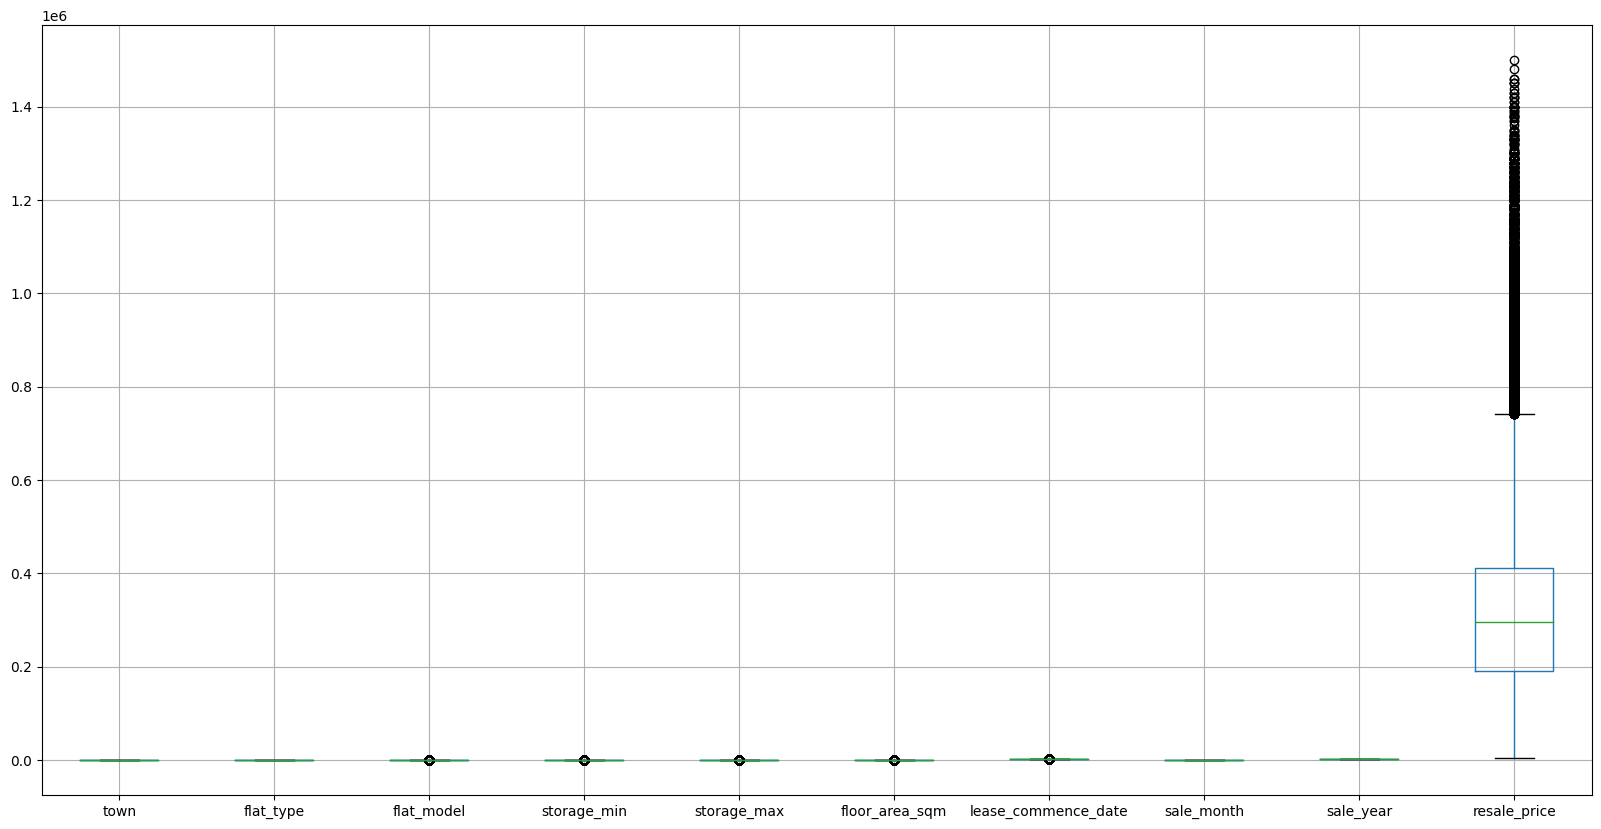

In [41]:
flat_resale_df.boxplot(figsize=(20,10))

## Feature Selection

<Axes: >

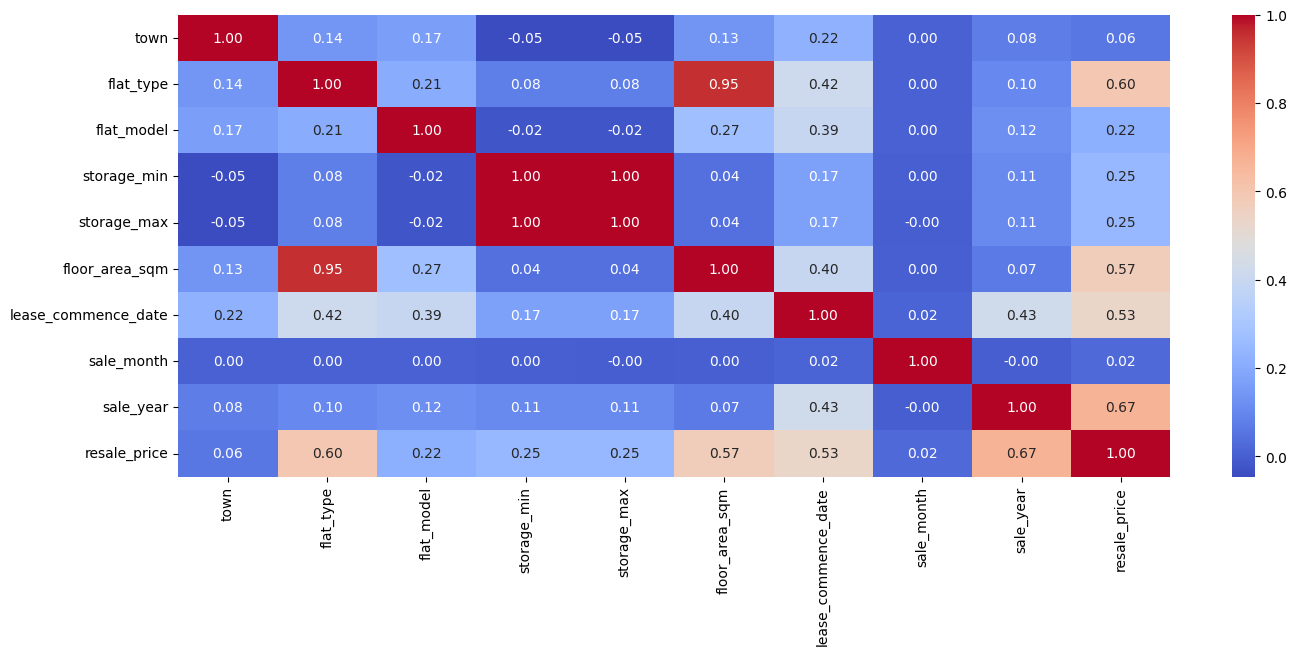

In [42]:
# Corr
corr_data = flat_resale_df.corr()
plt.figure(figsize=(16,6))
sns.heatmap(corr_data,annot=True,cmap="coolwarm",fmt=".2f")

In [43]:
# flat type and floor areq sqm is highly correlated. so we can drop flat type
# flat_resale_df.drop("flat_type", axis=1, inplace=True)
# store_min and storage_max are highly correlated
flat_resale_df.drop("storage_min", axis=1, inplace=True)

In [44]:
flat_resale_df.head(3)

,town,flat_type,flat_model,storage_max,floor_area_sqm,lease_commence_date,sale_month,sale_year,resale_price
0,1,2,1,12,44.0,1979,1,2017,232000.0
1,1,3,2,3,67.0,1978,1,2017,250000.0
2,1,3,2,3,67.0,1980,1,2017,262000.0


# **Log Transformation**

In [45]:
# using the log transformation method to handle the skewness data
flat_resale_df['flat_model'] = np.log(flat_resale_df['flat_model'])
flat_resale_df['storage_max'] = np.log(flat_resale_df['storage_max'])
flat_resale_df['floor_area_sqm'] = np.log(flat_resale_df['floor_area_sqm'])
flat_resale_df['lease_commence_date'] = np.log(flat_resale_df['lease_commence_date'])
flat_resale_df['resale_price'] = np.log(flat_resale_df['resale_price'])
flat_resale_df

,town,flat_type,flat_model,storage_max,floor_area_sqm,lease_commence_date,sale_month,sale_year,resale_price
0,1,2,0.000000,2.484907,3.784190,7.590347,1,2017,12.354493
1,1,3,0.693147,1.098612,4.204693,7.589842,1,2017,12.429216
2,1,3,0.693147,1.098612,4.204693,7.590852,1,2017,12.476100
3,1,3,0.693147,1.791759,4.219508,7.590852,1,2017,12.487485
4,1,3,0.693147,1.098612,4.204693,7.590852,1,2017,12.487485
...,...,...,...,...,...,...,...,...,...
914558,25,5,0.000000,2.484907,4.795791,7.593374,2,2012,13.075037
914559,25,5,0.000000,1.098612,4.804021,7.593878,2,2012,13.102161
914560,25,5,0.000000,1.098612,4.804021,7.594884,2,2012,13.098071
914561,25,6,1.609438,2.197225,5.198497,7.596894,2,2012,13.465953


# Resale Price Prediction - Regression Model

In [46]:
# set x and y
y = flat_resale_df['resale_price']
x = flat_resale_df.drop('resale_price', axis =1)

In [47]:
# split test and training data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((730084, 8), (182521, 8), (730084,), (182521,))

# **Model Selection**

In [48]:
from sklearn.ensemble import RandomForestRegressor
model_rfr = RandomForestRegressor(n_estimators=23, random_state=40)
model_rfr.fit(x_train, y_train)
y_pred= model_rfr.predict(x_test)
print("MAE:",metrics.mean_absolute_error(y_test, y_pred))
mse=metrics.mean_squared_error(y_test, y_pred)
rmse=np.sqrt(mse)
print("MSE:",mse)
print("RMSE:",rmse)
print("R2 Score:",metrics.r2_score(y_test, y_pred))

MAE: 0.05966048091674146
MSE: 0.007410511169609898
RMSE: 0.08608432592295706
R2 Score: 0.9799189419961727


In [49]:
from sklearn.linear_model import LinearRegression
model_lr = LinearRegression().fit(x_train, y_train)
y_pred= model_lr.predict(x_test)
print("MAE:",metrics.mean_absolute_error(y_test, y_pred))
mse=metrics.mean_squared_error(y_test, y_pred)
rmse=np.sqrt(mse)
print("MSE:",mse)
print("RMSE:",rmse)
print("R2 Score:",metrics.r2_score(y_test, y_pred))

MAE: 0.22375610000235654
MSE: 0.08765667931298489
RMSE: 0.2960687070816247
R2 Score: 0.7624672817543836


In [50]:
from sklearn.tree import DecisionTreeRegressor
model_dtr = DecisionTreeRegressor().fit(x_train, y_train)
y_pred=model_dtr.predict(x_test)
print("MAE:",metrics.mean_absolute_error(y_test, y_pred))
mse=metrics.mean_squared_error(y_test, y_pred)
rmse=np.sqrt(mse)
print("MSE:",mse)
print("RMSE:",rmse)
print("R2 Score:",metrics.r2_score(y_test, y_pred))

MAE: 0.07368219078803809
MSE: 0.011697530440258626
RMSE: 0.1081551221175337
R2 Score: 0.9683019454534153


In [52]:
from sklearn.ensemble import GradientBoostingRegressor
model_gbr = GradientBoostingRegressor().fit(x_train, y_train)
y_pred= model_gbr.predict(x_test)
print("MAE:",metrics.mean_absolute_error(y_test, y_pred))
mse=metrics.mean_squared_error(y_test, y_pred)
rmse=np.sqrt(mse)
print("MSE:",mse)
print("RMSE:",rmse)
print("R2 Score:",metrics.r2_score(y_test, y_pred))

MAE: 0.1058009332091212
MSE: 0.019466885023388412
RMSE: 0.1395237794190955
R2 Score: 0.9472484909122566


In [54]:
from sklearn.ensemble import AdaBoostRegressor
model_abr = AdaBoostRegressor().fit(x_train, y_train)
y_pred= model_abr.predict(x_test)
print("MAE:",metrics.mean_absolute_error(y_test, y_pred))
mse=metrics.mean_squared_error(y_test, y_pred)
rmse=np.sqrt(mse)
print("MSE:",mse)
print("RMSE:",rmse)
print("R2 Score:",metrics.r2_score(y_test, y_pred))

MAE: 0.1853221224116425
MSE: 0.054264418904707984
RMSE: 0.23294724489615237
R2 Score: 0.8529538761053121


In [55]:
from sklearn.ensemble import HistGradientBoostingRegressor
model_hgbr = HistGradientBoostingRegressor ().fit(x_train, y_train)
y_pred= model_hgbr.predict(x_test)
print("MAE:",metrics.mean_absolute_error(y_test, y_pred))
mse=metrics.mean_squared_error(y_test, y_pred)
rmse=np.sqrt(mse)
print("MSE:",mse)
print("RMSE:",rmse)
print("R2 Score:",metrics.r2_score(y_test, y_pred))

MAE: 0.07396602448103722
MSE: 0.009906712857058127
RMSE: 0.0995324713701922
R2 Score: 0.9731547161920925


# **Model Performance**

In [56]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score( model_rfr, X=x, y=y, cv=5, scoring='neg_mean_squared_error')
print("RFR Cross-validated Scores:", scores)
mean_mse = -scores.mean()
median_mse = -np.median(scores)
print("Mean MSE:", mean_mse)
print("Median MSE:", median_mse)
std_mse = scores.std()
print("Standard Deviation of MSE:", std_mse)

RFR Cross-validated Scores: [-0.02791327 -0.35429906 -0.06059903 -0.01574258 -0.04727433]
Mean MSE: 0.10116565402119448
Median MSE: 0.04727433197108177
Standard Deviation of MSE: 0.12750643891991173


In [57]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score( model_hgbr, X=x, y=y, cv=5, scoring='neg_mean_squared_error')
print("HGBR Cross-validated Scores:", scores)
mean_mse = -scores.mean()
median_mse = -np.median(scores)
print("Mean MSE:", mean_mse)
print("Median MSE:", median_mse)
std_mse = scores.std()
print("Standard Deviation of MSE:", std_mse)

HGBR Cross-validated Scores: [-0.02846765 -0.36631659 -0.06011216 -0.01333344 -0.04486449]
Mean MSE: 0.10261886790415671
Median MSE: 0.0448644947337223
Standard Deviation of MSE: 0.13277738339632622


In [58]:
flat_resale_df

,town,flat_type,flat_model,storage_max,floor_area_sqm,lease_commence_date,sale_month,sale_year,resale_price
0,1,2,0.000000,2.484907,3.784190,7.590347,1,2017,12.354493
1,1,3,0.693147,1.098612,4.204693,7.589842,1,2017,12.429216
2,1,3,0.693147,1.098612,4.204693,7.590852,1,2017,12.476100
3,1,3,0.693147,1.791759,4.219508,7.590852,1,2017,12.487485
4,1,3,0.693147,1.098612,4.204693,7.590852,1,2017,12.487485
...,...,...,...,...,...,...,...,...,...
914558,25,5,0.000000,2.484907,4.795791,7.593374,2,2012,13.075037
914559,25,5,0.000000,1.098612,4.804021,7.593878,2,2012,13.102161
914560,25,5,0.000000,1.098612,4.804021,7.594884,2,2012,13.098071
914561,25,6,1.609438,2.197225,5.198497,7.596894,2,2012,13.465953


In [ ]:
# Random forest regression model is selected as best model
# it gives the best r2 score

In [59]:
# Test data1
test_data=np.array([[25,6,1.609,1.791,5.093,7.59,2,2012]])
y_pred=model_rfr.predict(test_data)
print("SP:",y_pred[0])

SP: 13.306740840954282


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [60]:
# Test data2
test_data=np.array([[1,1,	0.693147,	1.098612,	4.204693,	7.589842,	1	,2017	]])
y_pred=model_rfr.predict(test_data)
print("SP:",y_pred[0])

SP: 12.499796899334365


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


# **Create Pickle file**

In [61]:
import pickle
with open('/content/singapore_flats_reg_model.pkl', 'wb') as f:
    pickle.dump(model_rfr, f)

In [62]:
flat_sale_df

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,storage_min,storage_max,sale_year,sale_month
0,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,232000.0,10,12,2017,1
1,2017-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,250000.0,1,3,2017,1
2,2017-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,262000.0,1,3,2017,1
3,2017-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,265000.0,4,6,2017,1
4,2017-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,265000.0,1,3,2017,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
914558,2012-02,YISHUN,5 ROOM,212,YISHUN ST 21,10 TO 12,121.0,Improved,1985,476888.0,10,12,2012,2
914559,2012-02,YISHUN,5 ROOM,758,YISHUN ST 72,01 TO 03,122.0,Improved,1986,490000.0,1,3,2012,2
914560,2012-02,YISHUN,5 ROOM,873,YISHUN ST 81,01 TO 03,122.0,Improved,1988,488000.0,1,3,2012,2
914561,2012-02,YISHUN,EXECUTIVE,664,YISHUN AVE 4,07 TO 09,181.0,Apartment,1992,705000.0,7,9,2012,2


In [63]:
test_data=np.array([[1,1,	0.693147,	1.098612,	4.204693,	7.589842,	1	,2017	]])
with open('/content/singapore_flats_reg_model.pkl', 'rb') as f:
    model = pickle.load(f)
y_pred = model.predict(test_data)
y_pred[0]

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


12.499796899334365

# **Streamlit app**

In [75]:
# Streamlit file for deployment
%%writefile app.py
import numpy as np
import pickle
import streamlit as st
from PIL import Image
import plotly.express as px
import pandas as pd


# Town mapping
def town_map(town):
  town_mapping={'ANG MO KIO':1, 'BEDOK':2, 'BISHAN':3, 'BUKIT BATOK':4, 'BUKIT MERAH':5,
       'BUKIT PANJANG':6, 'BUKIT TIMAH':7, 'CENTRAL AREA':8, 'CHOA CHU KANG':9,
       'CLEMENTI':10, 'GEYLANG':11, 'HOUGANG':12, 'JURONG EAST':13, 'JURONG WEST':14,
       'KALLANG/WHAMPOA':15, 'MARINE PARADE':16, 'PASIR RIS':17, 'PUNGGOL':18,
       'QUEENSTOWN':19, 'SEMBAWANG':20, 'SENGKANG':21, 'SERANGOON':21, 'TAMPINES':22,
       'TOA PAYOH':23, 'WOODLANDS':24, 'YISHUN':25, 'LIM CHU KANG':26
  }
  res=0
  for key,value in town_mapping.items():
    if town==key:
      res=int(value)
  return res

# Flat Model mapping
def flat_model_map(flat_model):
  flat_modelmapping= {'Improved': 1,'New Generation':2,
          'DBSS':3,'Standard':4,'Apartment':5,
          'Simplified':6,'Model A':7,'Premium Apartment':8,
          'Adjoined flat':9, 'Model A-Maisonette':10,
          'Maisonette':11,'Type S1':12,
          'Type S2':13,'Model A2':14,
          'Terrace':15, 'Improved-Maisonette':16,
          'Premium Maisonette':17, 'Multi Generation':18,
          '2-room':19, '3Gen':20
  }
  res=0
  for key,value in flat_modelmapping.items():
    if flat_model==key:
      res=int(value)
  return res

# Flat Modeltype mapping
def flat_type_map(flat_type):
  flat_typemapping= {'MULTI GENERATION': 7,
          '1 ROOM': 1, '2 ROOM': 2 , '3 ROOM': 3,
          '4 ROOM':4, '5 ROOM':5, 'EXECUTIVE': 6
  }
  res=0
  for key,value in flat_typemapping.items():
    if flat_type==key:
      res=int(value)
  return res


#streamlit  page setting
icon = Image.open("house.jpg")
st.set_page_config(page_title= "Singapore Flats Resale - Kavitha",
                page_icon= icon,
                layout= "wide",
                initial_sidebar_state= "expanded",
                )

st.subheader(":blue[Singapore Housing and Development Board (HDB)]")
tab1,tab4=st.tabs([":blue[Resale Price]",":blue[About]"])

with tab1:
  col1,col2,col3=st.columns(3)

  with col1:
    txt_town=st.text_input("Enter Town")
    txt_flat_model=st.text_input("Enter flat_model : ")
    txt_flat_type=st.text_input("Enter flat type:")
  with col2:
    txt_storage_range=st.text_input("Enter storage range:")
    txt_floor_area_sqm=st.number_input("Enter the Floor Area sqm:")
    txt_lease_commence_date=st.number_input("Enter Lease Commence Date:")
  with col3:
    txt_sale_month=st.number_input("Enter the sale month")
    txt_sale_year=st.number_input("Enter the sale year")


  # Mapping inputs
  txt_town_val=town_map(txt_town)
  txt_flat_model_val=flat_model_map(txt_flat_model)
  txt_flat_type_val=flat_type_map(txt_flat_type)

  if txt_storage_range !="":
    txt_storage_range_val=int(txt_storage_range.split(' TO ')[1])
  else:
    txt_storage_range_val=0

  # predict button process
  if st.button("Predict Selling Price", key="predict"):

      # make array for all user input values in required order for model prediction
      user_data = np.array([[txt_town_val,txt_flat_type_val,np.log(txt_flat_model_val),
                          np.log(txt_storage_range_val),
                          np.log(float(txt_floor_area_sqm)),np.log(int(txt_lease_commence_date)),
                          int(txt_sale_month),int(txt_sale_year)]])

      # load the regression pickle model
      with open('/content/singapore_flats_reg_model.pkl', 'rb') as f:
          model = pickle.load(f)

      # model predict the selling price based on user input
      y_pred = model.predict(user_data)

      # inverse transformation for log transformation data
      resale_price = np.exp(y_pred[0])

      # round the value with 2 decimal point
      resale_price = round(resale_price, 2)
      st.write("Predicted Resale Price: ", resale_price)
      st.write("Age of the Flat: ", int(txt_sale_year)-int(txt_lease_commence_date))

      flat_df=pd.read_csv("/content/realestate_predict.csv")
      flat_df.drop(['Unnamed: 0','month','storage_min','storage_max','sale_month','block','street_name'],axis=1,inplace=True)
      flat_df['flat_age']=flat_df['sale_year']-flat_df['lease_commence_date']
      flat_buyer_df=flat_df.query("town==@txt_town")

      flat_df=flat_df.query("flat_type==@txt_flat_type and flat_model==@txt_flat_model and storey_range==@txt_storage_range and floor_area_sqm==@txt_floor_area_sqm")
      flat_seller_df=flat_df.sort_values(['flat_age','resale_price','lease_commence_date','sale_year'], ascending=True)
      flat_seller_df1=flat_df[['town','flat_age','lease_commence_date','sale_year','resale_price']].copy()
      st.dataframe(flat_seller_df1, hide_index=True)

      # Seller View
      fig3 = px.area(flat_seller_df, y='resale_price', x='flat_age',
                    custom_data=['town', 'lease_commence_date', 'sale_year','flat_age'],
                    color_discrete_sequence=px.colors.sequential.Turbo,
                    title='Seller View')

      # Add custom data to hover information
      fig3.update_traces(hovertemplate='<br>'.join(['%{customdata[' + str(i) + ']}'
      for i in range(len(['town', 'lease_commence_date', 'sale_year','flat_age']))]) +
      '<br>Resale Price: %{y:Rs.,.2f}<extra></extra>')

      # Show the figure
      st.plotly_chart(fig3)

      # Buyer view

      fig1 = px.sunburst(flat_buyer_df, values='resale_price', path=['flat_model', 'flat_type', 'storey_range'],
            color_discrete_sequence=px.colors.sequential.RdBu, title='Buyer view')

      fig1.update_layout(
          width=1000,
          height=800,
      )

      st.plotly_chart(fig1)


with tab4:
    st.caption(":blue[Overview:]")
    st.caption(":blue[5 dateset has concatenated into one dataset]")
    st.caption(":blue[Data Cleaning has done for the all the null values and negative values]")
    st.caption(":blue[All the EDA process has followed]")
    st.caption(":blue[data transformated for removing outliers]")
    st.caption(":blue[Few feature has selected for resale price prediction]")
    st.caption(":blue[Random forest regressor Model has been trained and tested]")
    st.caption(":blue[For Seller's benefit area chart has been provided for taking decision based on the historical null_data]")
    st.caption(":blue[For Buyer's benefit sun burst chart has been provided for checking areawise flatmodel]")

Overwriting app.py


In [ ]:
pip install streamlit

In [ ]:
!npm install localtunnel

In [74]:
!streamlit run /content/app.py &>/content/logs.txt & npx localtunnel --port 8501 & curl ipv4.icanhazip.com

34.118.197.188
npx: installed 22 in 1.888s
your url is: https://whole-dodos-sell.loca.lt
